# Individual Assignment 6

### Scenario:
During the increased success that ACME has been experiencing by adopting better software engineering techniques, they would like to know how to better predict their product schedules.

### Guidance:
Feel free to rearrange the code in the notebook to be to your liking, and if you choose to make improvements, please add a summary near the top explaining how the notebook is structured at a high level.  While the code quality itself isn't graded, if poor quality impacts understandability, then it could negatively effect scoring.


## Part 1

Using the example from class as a starting point, model the following scheule with a monte carlo simulation.  
1. Task 1 Best Case 7 days, Worst Case 18 days
2. Task 2 Best Case 2 days, Worst Case 8 days
3. Task 3 Best Case 10 days, Worst Case 22 days
4. Task 4 Best Case 7 days, Worst Case 18 days
5. Task 5 Best Case 14 days, Worst Case 30 days

Where does the solution converge to in this simulation after 5000 iterations?  Show the distribution in a plot similar to the example in class.

Based on the code below, we converge on around 68 days and a 95% we will get all the tasks done in 81 days.

Worst case: 92 days
Best case: 45 days
Median: 68.0; Mean: 67.874
95% confidence: 80.0


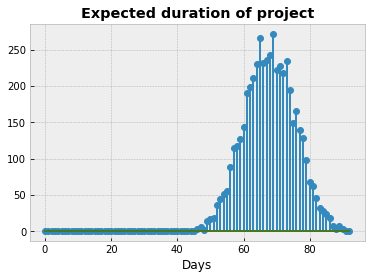

In [8]:
import numpy
import matplotlib.pyplot as plt

def get_task_days(low, high) -> int:
    u = numpy.random.uniform(low, high)
    return round(u)
    
def get_total_days() -> int:
    return get_task_days(7, 18) + get_task_days(2, 8) + get_task_days(10, 22) + get_task_days(7, 18) + get_task_days(14, 30)

N = 5000
sim = numpy.zeros(N, dtype=int)

for i in range(N):
    sim[i] = get_total_days()

plt.style.use("bmh")
plt.stem(numpy.bincount(sim), use_line_collection=True)
plt.title("Expected duration of project", weight="bold")
plt.xlabel("Days")

print(f'Worst case: {sim.max()} days')
print(f'Best case: {sim.min()} days')
print(f'Median: {numpy.median(sim)}; Mean: {numpy.mean(sim)}')
print(f'95% confidence: {numpy.percentile(sim, 95)}')

## Part 2

Modify the script from part 1 such that it models the distributions as triangular distributions with the following criteria.  Also assume that task 3 and 4 can be performed in parallel.

1. Task 1 Best Case 7 days, Worst Case 18 days, Most Likely 10 days
2. Task 2 Best Case 2 days, Worst Case 8 days, Most Likely 3 days
3. Task 3 Best Case 10 days, Worst Case 22 days, Most Likely 18 days
4. Task 4 Best Case 7 days, Worst Case 18 days, Most Likely 15 days
5. Task 5 Best Case 14 days, Worst Case 30 days, Most Likely 18 days

Where does the solution converge to in this simulation after 5000 iterations?  Show the distribution in a plot similar to the example in class.

Based on the code below, we get around a 54 day average and a 95% chance we get done in 62 days. I guess it looks like if we know an estimate of when we will get done, we will be able to figure out how fast we can get done faster.

Worst case: 71 days
Best case: 39 days
Median: 54.0; Mean: 53.6958
95% confidence: 62.0


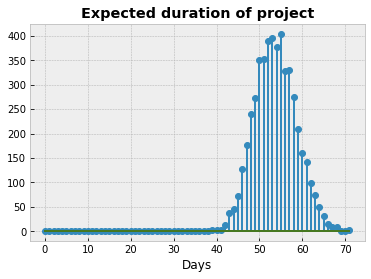

In [9]:
import numpy
import matplotlib.pyplot as plt

def get_task_days(low, most, high) -> int:
    u = numpy.random.triangular(low, most, high)
    return round(u)
    
def get_total_days() -> int:
    return get_task_days(7,10, 18) + get_task_days(2, 3, 8) + max(get_task_days(10, 18, 22), get_task_days(7, 15, 18)) + get_task_days(14, 18, 30)

N = 5000
sim = numpy.zeros(N, dtype=int)

for i in range(N):
    sim[i] = get_total_days()

plt.style.use("bmh")
plt.stem(numpy.bincount(sim), use_line_collection=True)
plt.title("Expected duration of project", weight="bold")
plt.xlabel("Days")

print(f'Worst case: {sim.max()} days')
print(f'Best case: {sim.min()} days')
print(f'Median: {numpy.median(sim)}; Mean: {numpy.mean(sim)}')
print(f'95% confidence: {numpy.percentile(sim, 95)}')